# Study Case Astra Creditscore (Exploratory Data Analysis)

Topik Zulkarnain, 5 September 2019
***

## Loading Data 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('Study Case Astra Credit Score Training.csv')

In [20]:
data.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


In [42]:
data.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24608.0,24431.0,23882.0,1701.0,1601.0,1288.0,0
1,2,20000.0,1,1,2,41,1,2,0,17041.0,16475.0,17204.0,1.0,1301.0,1501.0,0
2,3,20000.0,1,1,2,36,0,0,0,17333.0,18601.0,17948.0,1581.0,1368.0,1179.0,0
3,4,20000.0,1,1,2,35,0,0,0,2004.0,2949.0,3373.0,1087.0,1001.0,1.0,0
4,5,170000.0,1,1,2,38,0,0,0,171466.0,145197.0,110164.0,18501.0,13999.0,3761.0,0


## Informasi Mengenai Data
Data berisi informasi terkait pelanggan kartu kredit di suatu negara pada periode Januari-Maret 2015. Informasi meliputi latar belakang pelanggan, jumlah tagihan, jumlah pembayaran, lama terlambat bayar dan status pembayaran bulan berikutnya (April 2015).

## Tujuan Pemodelan 
Memprediksi apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei berdasarkan data pada bulan Februari-April 2015 pada data testing.

# Exploratory Data Analysis
## Data Quick Look

In [21]:
#Check apakah terdapat missing value pada data
data.isnull().sum()

ID           0
LIMIT_BAL    0
MARRIAGE     0
EDUCATION    0
SEX          0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
TARGET       0
dtype: int64

Tidak terdapat missing value pada data

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


data memiliki 15 feature dengan label TARGET, dimana label TARGET akan diprediksi dengan menggunakan feature-feature yang ada. Namun feature seperti ID akan didrop karna tidak bermanfaat untuk analisis data.

## Visualisasi Data
Data credit akan di visualisasikan agar didapatkan insight bisnis dari visualisasi.

In [28]:
Data_klasifikasi = data[['MARRIAGE','EDUCATION', 'SEX', 'TARGET','AGE']]
Data_Numerik = data[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3']]

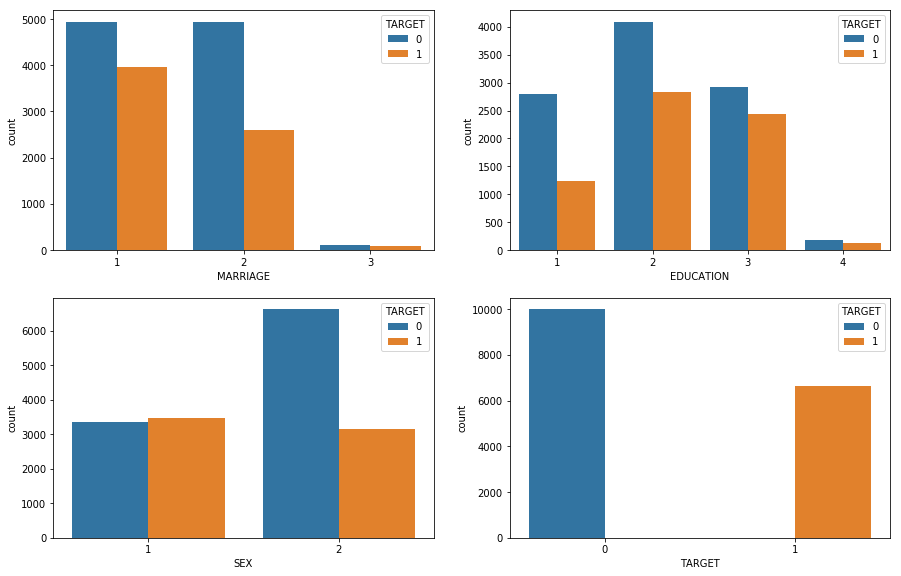

In [24]:
fig = plt.figure(figsize = (15,15))
axes = 320
for cat in Data_klasifikasi.drop(columns = ['AGE']):
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = data, x = cat, hue ='TARGET')
plt.show()

Dari countplot yang dihasilkan dari data maka didapatkan insight
1. Proporsi orang yang tepat bayar pada orang yang sudah menikah lebih banyak dibandingkan yang belum
2. Semakin tinggi tingkat edukasi dari seseorang maka semakin kecil juga chance mereka dalam telat membayar
3. Wanita memiliki chance yang sangat tinggi dalam tepat waktu bayar, sedangkan pria cenderung lebih tinggi chance untuk telat membayar

Rekomendasi :
Dari insight visualisasi yang didapat sebetulnya dapat dibentuk scoring layak atau tidaknya seseorang untuk menerima kredit sebelum diberikan, agar perusahaan tidak berhadapan dengan resiko tinggi dalam ketelatan dalam pembayaran.

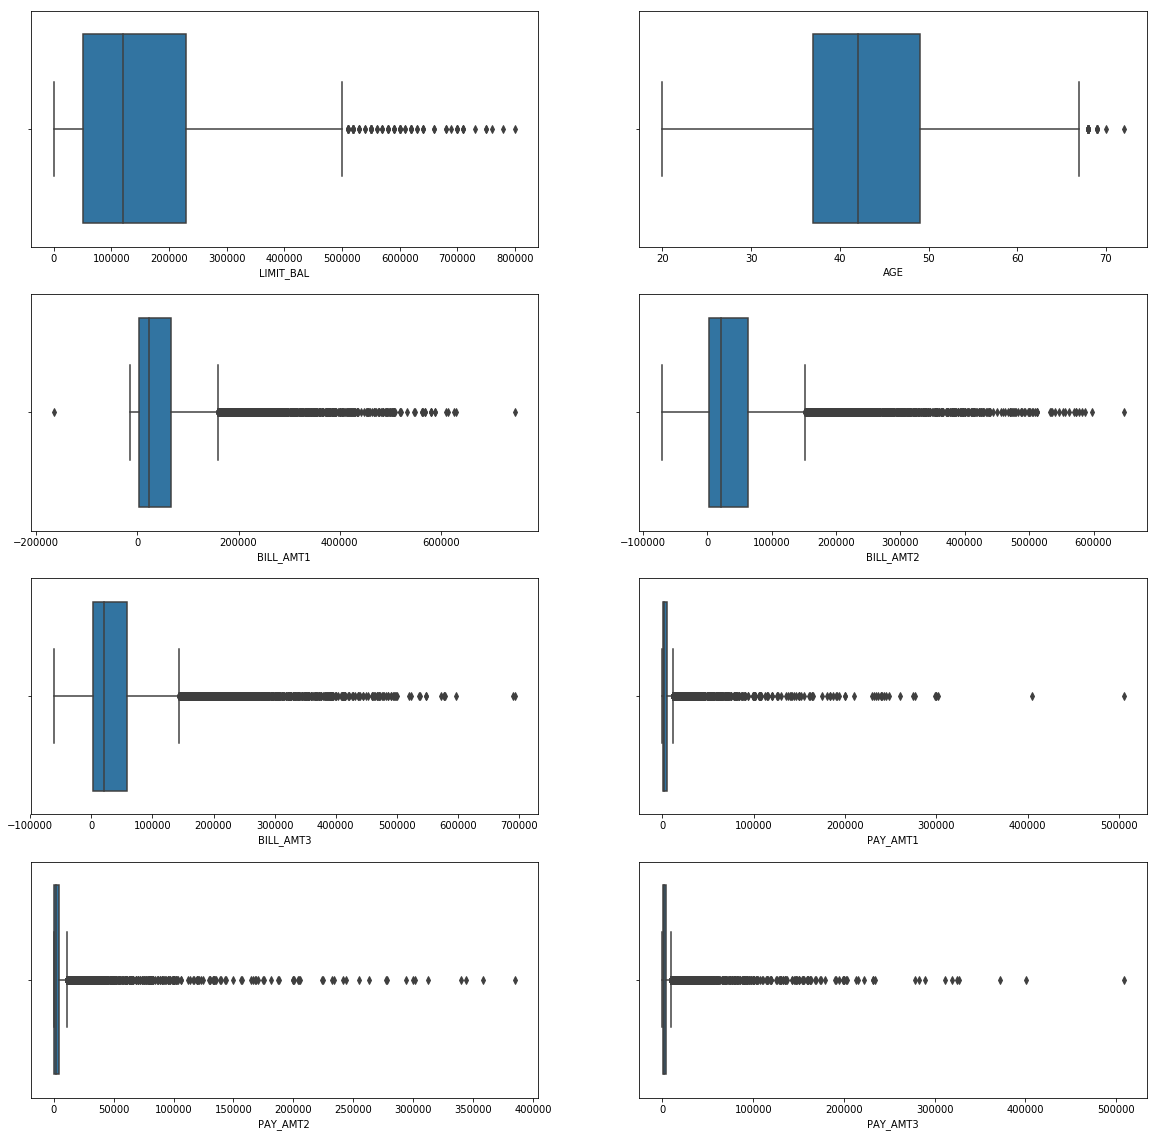

In [43]:
fig = plt.figure(figsize = (20,20))
axes = 420
for num in Data_Numerik:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = data, x = num )
plt.show()

Dari boxplot yang dihasilkan dapat terlihat bahwa terdapat banyak sekali outlier pada data, oleh karena itu harus digunakan transformasi data untuk menanggulangin banyaknya outlier yang ada.

### Transformasi Data, Menghilangkan Outlier dengan Menggunakan Transformasi Logaritma 

In [ ]:
# terdapat nilai data yang 0 oleh karena itu harus ditambah konstanta 1 agar logaritma tidak tak hingga
data['PAY_AMT1'] = data['PAY_AMT1'] +1
data['PAY_AMT2'] = data['PAY_AMT2'] +1
data['BILL_AMT1'] = data['BILL_AMT1'] +1
data['BILL_AMT2'] = data['BILL_AMT2'] +1
data['BILL_AMT3'] = data['BILL_AMT3'] +1

In [45]:
Data_Numerik =np.log(data[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3']])

C:\Users\topikz064115\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\topikz064115\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


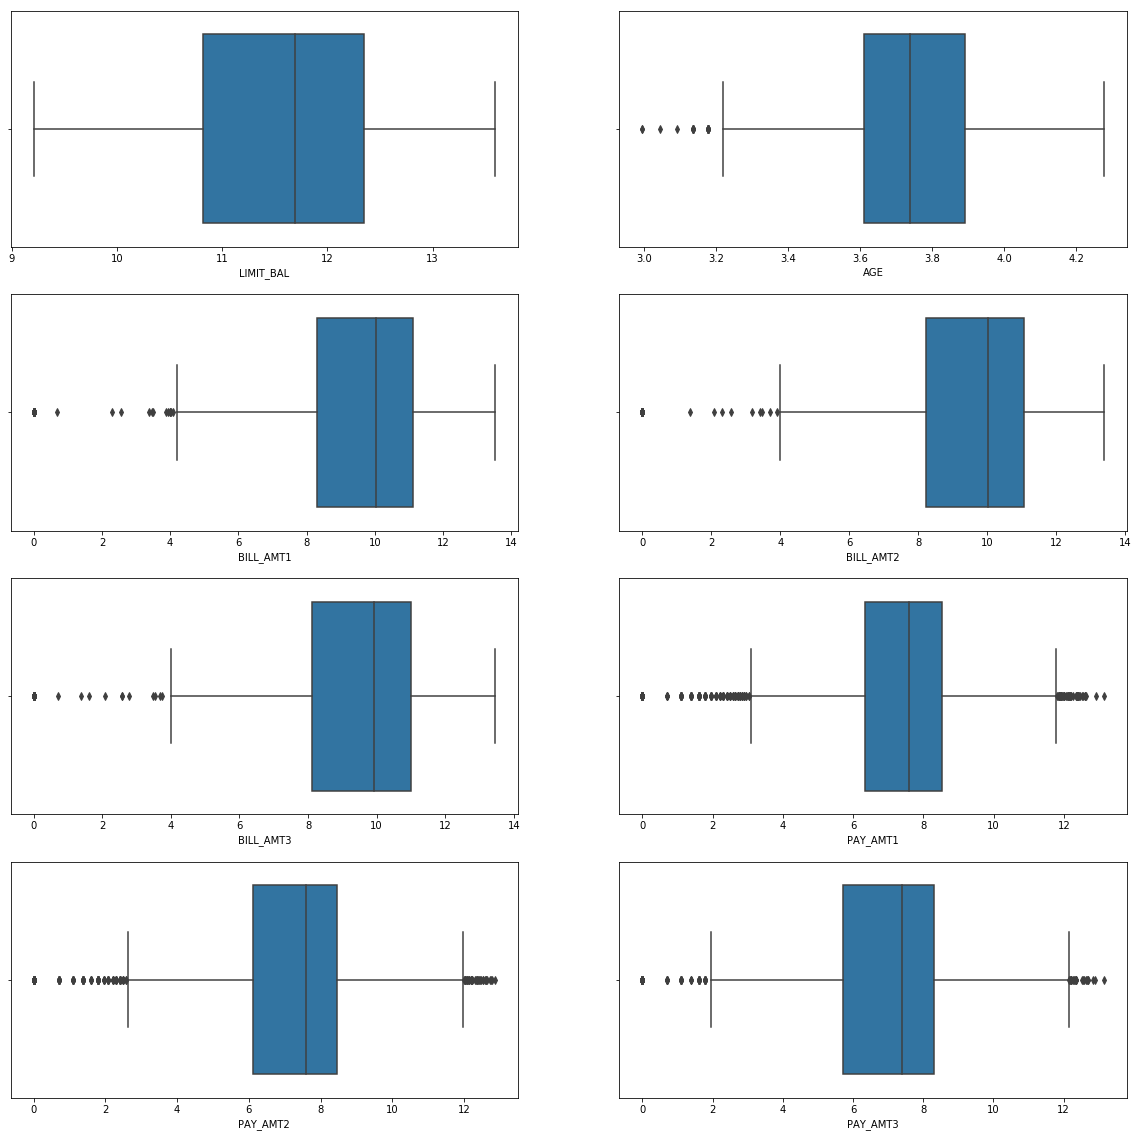

In [57]:
fig = plt.figure(figsize = (20,20))
axes = 420
for num in Data_Numerik:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = Data_Numerik, x = num )
plt.show()